# Spam classfication 

## Importing libraries

In [1]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import re
import time
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
%matplotlib inline 

[nltk_data] Downloading package wordnet to /home/arrry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dataset Location

In [2]:
dataset = '../data/spam - spam.csv'

## Convert to dataframe

In [3]:
df = pd.read_csv(dataset)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Replacing Column names

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df = df.rename(columns={'v1': 'target', 'v2': 'message'})
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Duplicate removal

In [5]:
print(f'Number of duplicated rows are', df.duplicated().sum())
print(f'The shape of the dataset is', df.shape)
df[df.duplicated()]


Number of duplicated rows are 409
The shape of the dataset is (5572, 2)


,target,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [6]:
df.drop_duplicates(inplace=True)
print(f'The shape of the dataset after removing duplicate is ', df.shape)

The shape of the dataset after removing duplicate is  (5163, 2)


In [7]:
df

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Text Preprocessing
- Removing Stopwords
- Removing Punctuations
- Stemming 
- Lemmetization

In [8]:
def cleanText(text):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in text]
    text = [word for word in text if word not in stopwords.words('english')]
    text = list(filter(None, text))
    text = ' '.join(text)
    token = nltk.word_tokenize(text)
    stem = [ps.stem(word) for word in token]
    lamm = [lemmatizer.lemmatize(word) for word in token]
    return text, stem, lamm

df['cleaned_text'] = df['message'].apply(lambda x: cleanText(x)[0])
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: str(x).replace('[', '').replace(']', ''))
df['stemed_text'] = df['message'].apply(lambda x: cleanText(x)[1])
df['stemed_text'] = df['stemed_text'].apply(lambda x: str(x).replace('[', '').replace(']', ''))
df['lemmatized_text'] = df['message'].apply(lambda x: cleanText(x)[2])
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: str(x).replace('[', '').replace(']', ''))


In [9]:
df.head()

,target,message,cleaned_text,stemed_text,lemmatized_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,"'go', 'jurong', 'point', 'crazi', 'avail', 'bu...","'go', 'jurong', 'point', 'crazy', 'available',..."
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"'ok', 'lar', 'joke', 'wif', 'u', 'oni'","'ok', 'lar', 'joking', 'wif', 'u', 'oni'"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,"'free', 'entri', '2', 'wkli', 'comp', 'win', '...","'free', 'entry', '2', 'wkly', 'comp', 'win', '..."
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,"'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', '...","'u', 'dun', 'say', 'early', 'hor', 'u', 'c', '..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though,"'nah', 'nt', 'think', 'goe', 'usf', 'live', 'a...","'nah', 'nt', 'think', 'go', 'usf', 'life', 'ar..."


## Dataframe for CV results


In [10]:
df_models = pd.DataFrame(columns=['model_name', 'accuracy', 'time_taken'])

## Bag of words 

In [11]:
cv = CountVectorizer()  

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['target'], test_size=0.2, random_state=42)

# fit the model
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

trainGaus=X_train_cv.toarray()
testGaus=X_test_cv.toarray()

# Using Naive Bayes Classifier

In [12]:
# train the model
models = [MultinomialNB(), BernoulliNB()]
for model in models:
    model = model.fit(X_train_cv, y_train)
    y_pred = model.predict(X_test_cv)
    y_pred
    print(f'Accuracy of the {model} model is', accuracy_score(y_test, y_pred)*100)    

model = GaussianNB()
start = time.time()
model.fit(X_train_cv.toarray(), y_train)
y_pred = model.predict(X_test_cv.toarray())
y_pred
print(f'Accuracy of the {model} model is', accuracy_score(y_test, y_pred)*100)
# Accuracy of the MultinomialNB() model with text cleaning is 97.2894482090997
# Accuracy of the BernoulliNB() model with text cleaning is 96.51500484027106
# Accuracy of the GaussianNB() model with text cleaning is 88.2865440464666

Accuracy of the MultinomialNB() model is 98.16069699903196
Accuracy of the BernoulliNB() model is 97.38625363020329
Accuracy of the GaussianNB() model is 89.73862536302033


## Other models with a prediction parameter

In [13]:
from sklearn.utils import all_estimators
estimators = all_estimators()
estimators

models = []

for name, class_ in estimators:
    try:
        if hasattr(class_, 'predict_proba'):
            models.append((name, class_))
    except:
        pass


def eval(model):
    start = time.time()
    model.fit(X_train_cv, y_train)
    y_pred = model.predict(X_test_cv)
    end = time.time()
    time_taken = end - start
    accuracy = accuracy_score(y_test, y_pred)*100
    return accuracy, time_taken

for model in models:
    try:
        ans = eval(model[1]())
        df_models = pd.concat([df_models, pd.DataFrame([[model[0], ans[0], ans[1]]], columns=['model_name', 'accuracy', 'time_taken'])])
    except:
        pass
    
df_models

,model_name,accuracy,time_taken
0,AdaBoostClassifier,96.611810,0.696584
0,BaggingClassifier,95.934172,1.062076
0,BernoulliNB,97.386254,0.012100
0,CalibratedClassifierCV,98.644724,0.177198
0,ComplementNB,96.515005,0.010757
0,DecisionTreeClassifier,95.643756,0.131743
0,DummyClassifier,88.770571,0.001799
0,ExtraTreeClassifier,96.127783,0.017295
0,ExtraTreesClassifier,98.160697,1.323269
0,GradientBoostingClassifier,96.708616,1.091855


## Graphical Representation of Result

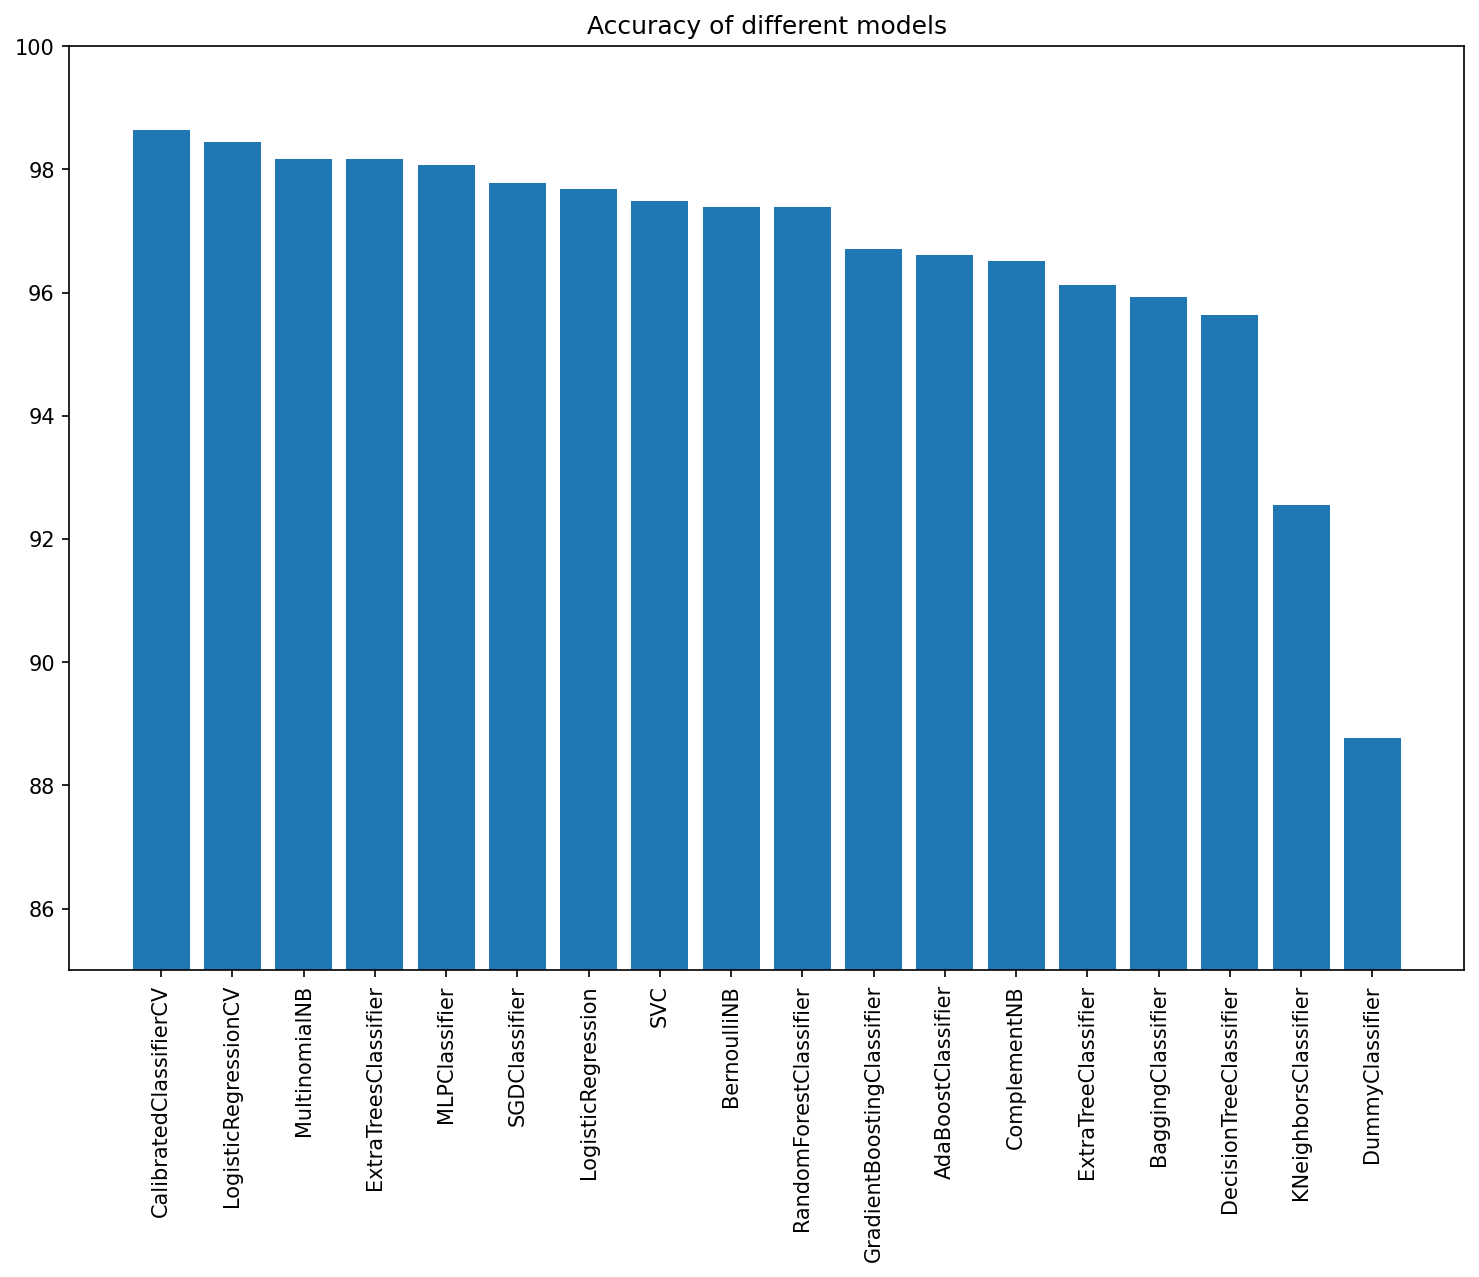

In [14]:
df_models.sort_values(by='accuracy', ascending=False, inplace=True)
plt.figure(figsize=(12, 8), dpi=150, edgecolor='black')
plt.bar(df_models['model_name'], df_models['accuracy'])
plt.xticks(rotation=90)
plt.ylim(85, 100)
plt.title('Accuracy of different models')
plt.show()

## Dataframe for TFIDF Result

In [15]:
df_models_tfidf = pd.DataFrame(columns=['model_name', 'accuracy', 'time_taken'])

## TFIDF

In [16]:
tfidf = TfidfVectorizer(max_features=2500)

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['target'], test_size=0.2, random_state=42)    

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

trainGaus=X_train_tfidf.toarray()
testGaus=X_test_tfidf.toarray()

## Classification using Naive Bayes

In [17]:

models = [MultinomialNB(), BernoulliNB()]
for model in models:
    model = model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    y_pred
    print(f'Accuracy of the {model} model is', accuracy_score(y_test, y_pred)*100)    

model = GaussianNB()
start = time.time()
model.fit(X_train_tfidf.toarray(), y_train)
y_pred = model.predict(X_test_tfidf.toarray())
y_pred
print(f'Accuracy of the {model} model is', accuracy_score(y_test, y_pred)*100)

Accuracy of the MultinomialNB() model is 97.87028073572121
Accuracy of the BernoulliNB() model is 98.45111326234269
Accuracy of the GaussianNB() model is 85.76960309777347


## Other models with prediction parameter

In [18]:
estimators = all_estimators()
estimators

models = []

for name, class_ in estimators:
    try:
        if hasattr(class_, 'predict_proba'):
            models.append((name, class_))
    except:
        pass


def eval(model):
    start = time.time()
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    end = time.time()
    time_taken = end - start
    accuracy = accuracy_score(y_test, y_pred)*100
    return accuracy, time_taken

for model in models:
    try:
        ans = eval(model[1]())
        df_models_tfidf = pd.concat([df_models_tfidf, pd.DataFrame([[model[0], ans[0], ans[1]]], columns=['model_name', 'accuracy', 'time_taken'])])
    except:
        pass


/home/arrry/anaconda3/envs/Language/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
df_models_tfidf

,model_name,accuracy,time_taken
0,AdaBoostClassifier,96.805421,0.935350
0,BaggingClassifier,95.837367,1.667313
0,BernoulliNB,98.451113,0.010717
0,CalibratedClassifierCV,98.063892,0.091581
0,ComplementNB,95.546951,0.011404
0,DecisionTreeClassifier,95.353340,0.276865
0,DummyClassifier,88.770571,0.001748
0,ExtraTreeClassifier,93.804453,0.018074
0,ExtraTreesClassifier,97.773475,1.277575
0,GradientBoostingClassifier,96.611810,1.974689


## Graphical Representation of Result

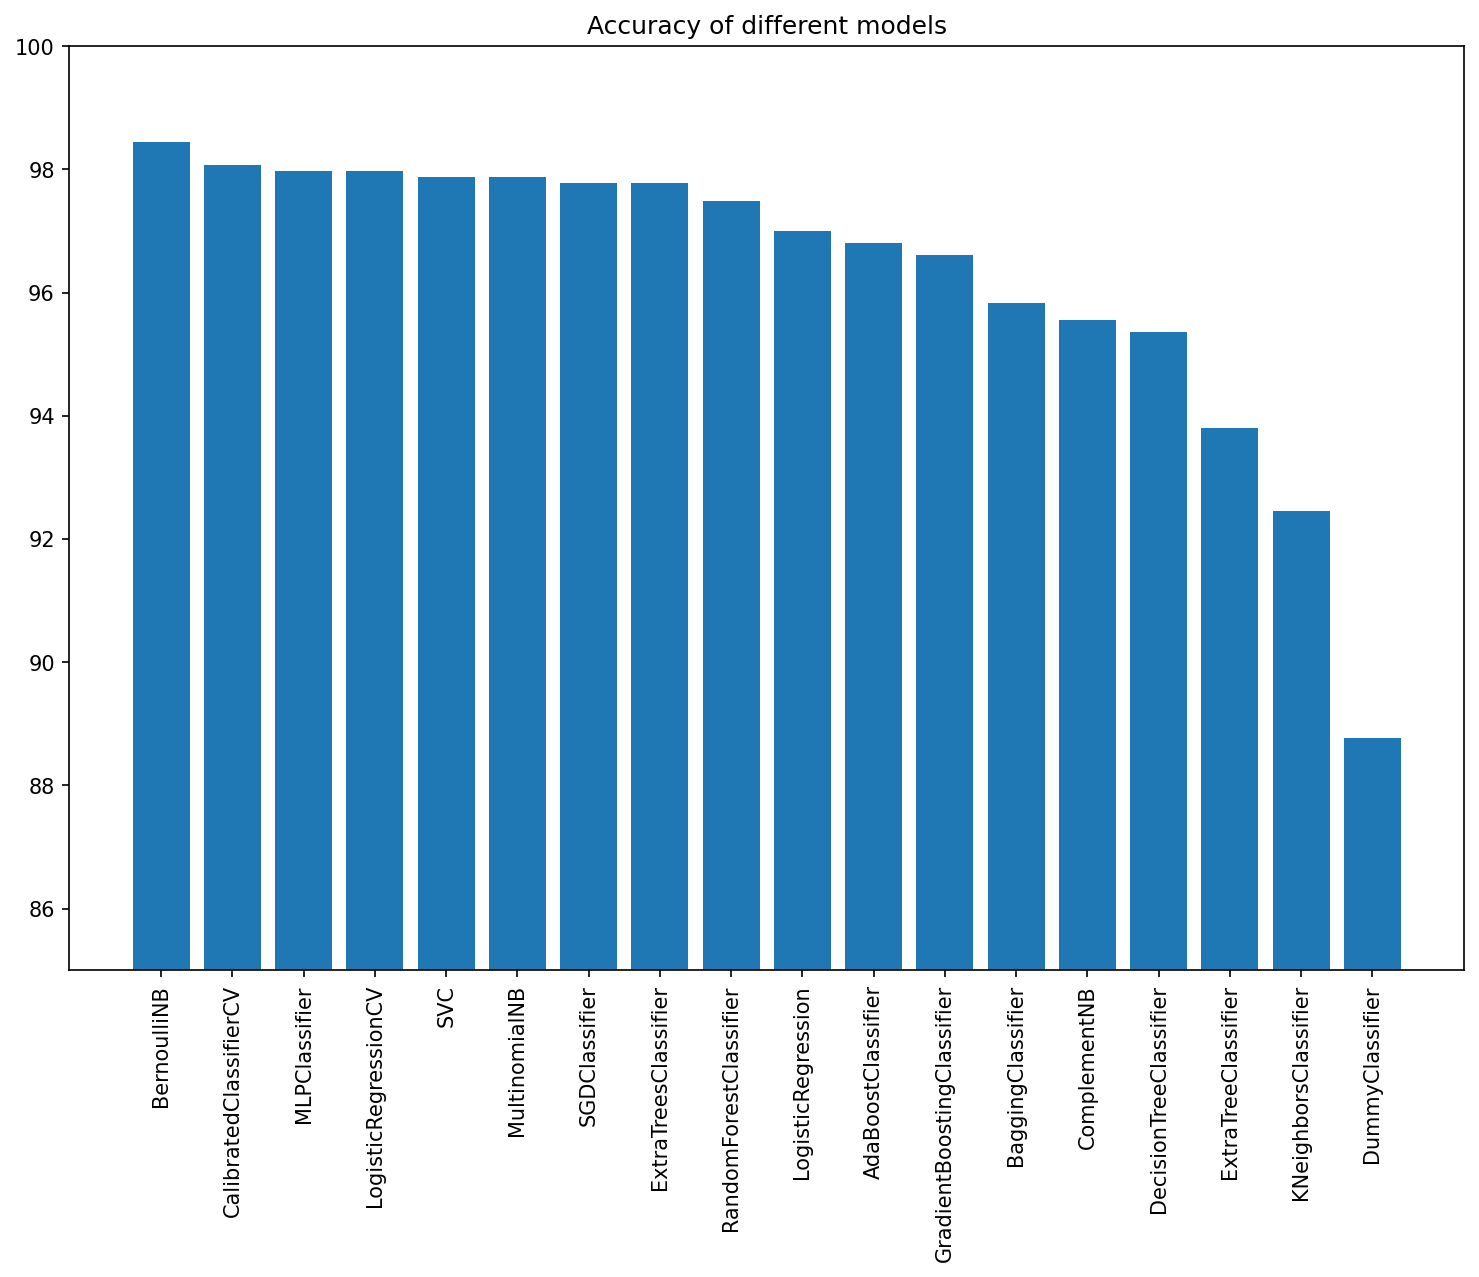

In [20]:
df_models_tfidf.sort_values(by='accuracy', ascending=False, inplace=True)
plt.figure(figsize=(12, 8), dpi=150, edgecolor='black')
plt.bar(df_models_tfidf['model_name'], df_models_tfidf['accuracy'])
plt.xticks(rotation=90)
plt.ylim(85, 100)
plt.title('Accuracy of different models')
plt.show()